# * Kurapati Venkatesh

# * 09012021

# * Topic: Simple Linear Regression ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## A  student from a certain University was asked to prepare a dataset and build a prediction model for predicting SAT scores based on the exam giver’s GPA. Approach - A regression model needs to be built with target variable ‘SAT_Scores’and record the RMSE values, Correlation coefficient values for different transformation models.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### A Simple Linear regression model needs to be built with target variable ‘SAT_Scores’.

## -------------------------------------------------------------------------------------------

## Import libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

## import dataset:

In [2]:
sg=pd.read_csv(r"G:\360digit\assignments meterial\SLR\SAT_GPA.csv")

## Data Exploration:

In [4]:
sg.head()

,SAT_Scores,GPA
0,206,2.3
1,214,2.4
2,717,3.5
3,580,2.8
4,404,2.6


In [5]:
sg=sg.rename(columns={'SAT_Scores': 'ss','GPA': 'gp' })

In [6]:
sg.head()

,ss,gp
0,206,2.3
1,214,2.4
2,717,3.5
3,580,2.8
4,404,2.6


In [7]:
sg.corr()

,ss,gp
ss,1.000000,0.293538
gp,0.293538,1.000000


Text(0, 0.5, 'SAT Scores')

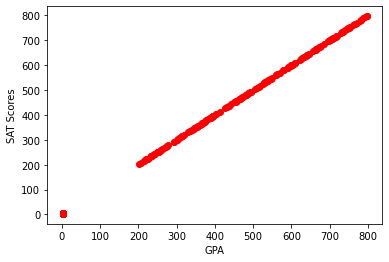

In [8]:
plt.scatter(x=sg, y=sg, color='red')
plt.xlabel("GPA")
plt.ylabel("SAT Scores")

In [9]:
sg.describe()

,ss,gp
count,200.000000,200.000000
mean,491.810000,2.849500
std,174.893834,0.541076
min,202.000000,2.000000
25%,349.750000,2.400000
50%,480.500000,2.800000
75%,641.500000,3.400000
max,797.000000,3.900000


### Importing statsmodels.formula.api for linear regression model:

In [10]:
import statsmodels.formula.api as smf

In [11]:
model=smf.ols("ss~gp",data=sg).fit()

In [12]:
model.params

Intercept    221.445677
gp            94.881321
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ss   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.67
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           2.46e-05
Time:                        22:23:20   Log-Likelihood:                -1307.1
No. Observations:                 200   AIC:                             2618.
Df Residuals:                     198   BIC:                             2625.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    221.4457     63.685      3.477      0.001      95.857     347.034
gp            94.8813     21.959      4.321      0.000      51.577     138.185
==============================================================================
Omnibus:                       49.866   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.783
Skew:                          -0.036   Prob(JB):                      0.00751
Kurtosis:                       1.919   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The statistics we are mainly concerned with to determine whether the model is viable or not are:
* The coefficients and its p-value(significance)
* R-squared value
* F-statistic and its significance

### Inferences from model:

1. The coefficient for gp is 94.8813, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
2. We have to make sure that the p-value should always be less for the coefficient to be significant.
3. R-squared value is 0.086, which means that 8.6% of the SAT scores variance can be explained by the GPA column using this line.
4. Prob F-statistic has a very low p-value, which gives us that the model fit is not a statistically significant.

In [14]:
model.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,95.856957,347.034396
gp,51.577311,138.185330


In [15]:
pred = model.predict(sg) # Predicted values of wg using the model

In [16]:
sqrt(mean_squared_error(sg.ss, pred))

166.77079507773027

### Visualization of regression line over the scatter plot of st & dt:

Text(0, 0.5, 'SAT Scores')

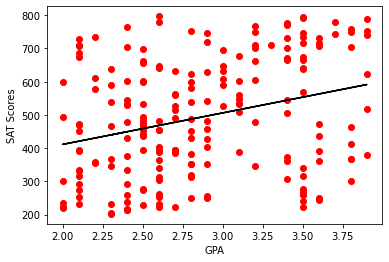

In [17]:
plt.scatter(x=sg.gp, y=sg.ss, color='red')
plt.plot(sg.gp, pred,color='black')
plt.xlabel("GPA")
plt.ylabel("SAT Scores")

In [18]:
pred.corr(sg.ss)

0.2935382754761453

### Transforming variables for accuracy:

In [19]:
model1 = smf.ols('ss~np.log(gp)',data=sg ).fit()

In [20]:
model1.params

Intercept     212.184739
np.log(gp)    271.664551
dtype: float64

In [21]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ss   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.75
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           2.37e-05
Time:                        22:26:27   Log-Likelihood:                -1307.1
No. Observations:                 200   AIC:                             2618.
Df Residuals:                     198   BIC:                             2625.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    212.1847     65.663      3.231      0.001      82.697     341.673
np.log(gp)   271.6646     62.746      4.330      0.000     147.928     395.401
==============================================================================
Omnibus:                       48.590   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.664
Skew:                          -0.023   Prob(JB):                      0.00797
Kurtosis:                       1.924   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inferences from model1:

1. The coefficient for dt is 271.6646, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
2. We have to make sure that the p-value should always be less for the coefficient to be significant.
3. R-squared value is 0.086, which means that 8.6% of the SAT scores variance can be explained by the GPA column using this line.
4. Prob F-statistic has a very low p-value, which gives us that the model fit is a statistically significant.

In [22]:
model1.conf_int(0.01)

,0,1
Intercept,41.403161,382.966316
np.log(gp),108.469139,434.859962


In [23]:
pred1 = model1.predict(sg)

In [24]:
sqrt(mean_squared_error(sg.ss, pred1))

166.74152083175179

In [25]:
pred1.corr(sg.ss)

0.2940841931102884

## Conclusion:

Model having highest R-Squared value is better i.e. (neither of them are good model)